In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import warnings
import seaborn as sns
import mglearn
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
#sweetviz 설치

#pip install sweetviz

In [131]:
data = pd.read_csv('data/Loan_Default.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [132]:
#ID, year 변수 삭제
data.drop(['ID','year'],axis=1,inplace=True)

#Status(종속변수) object type으로 변경
data['Status'] = data['Status'].astype(str)


In [133]:
# 범주형, 수치형 변수 분리
category_data = data.loc[:,data.dtypes == 'object']
numerical_data = data.loc[:,data.dtypes != 'object']

In [14]:
# 범주형 변수 통계
category_data.describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148470,148470,148670,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,3,2,4,4,2,7,2,4,2,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct,0
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,138201,148637,146480,48152,74392,34720,95814,74722,148637,112031


In [15]:
# 수치형 변수 통계
numerical_data.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,61.000000


loan_amount, property_value는 스케일링이 필요하다.

In [16]:
# sweetviz
advert_report = sv.analyze(data)
advert_report.show_html('./first_search.html')

                                             |      | [  0%]   00:00 -> (? left)

Report ./first_search.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:96: execution error: 일부 대상체 파일을 발견할 수 없습니다. (-43)


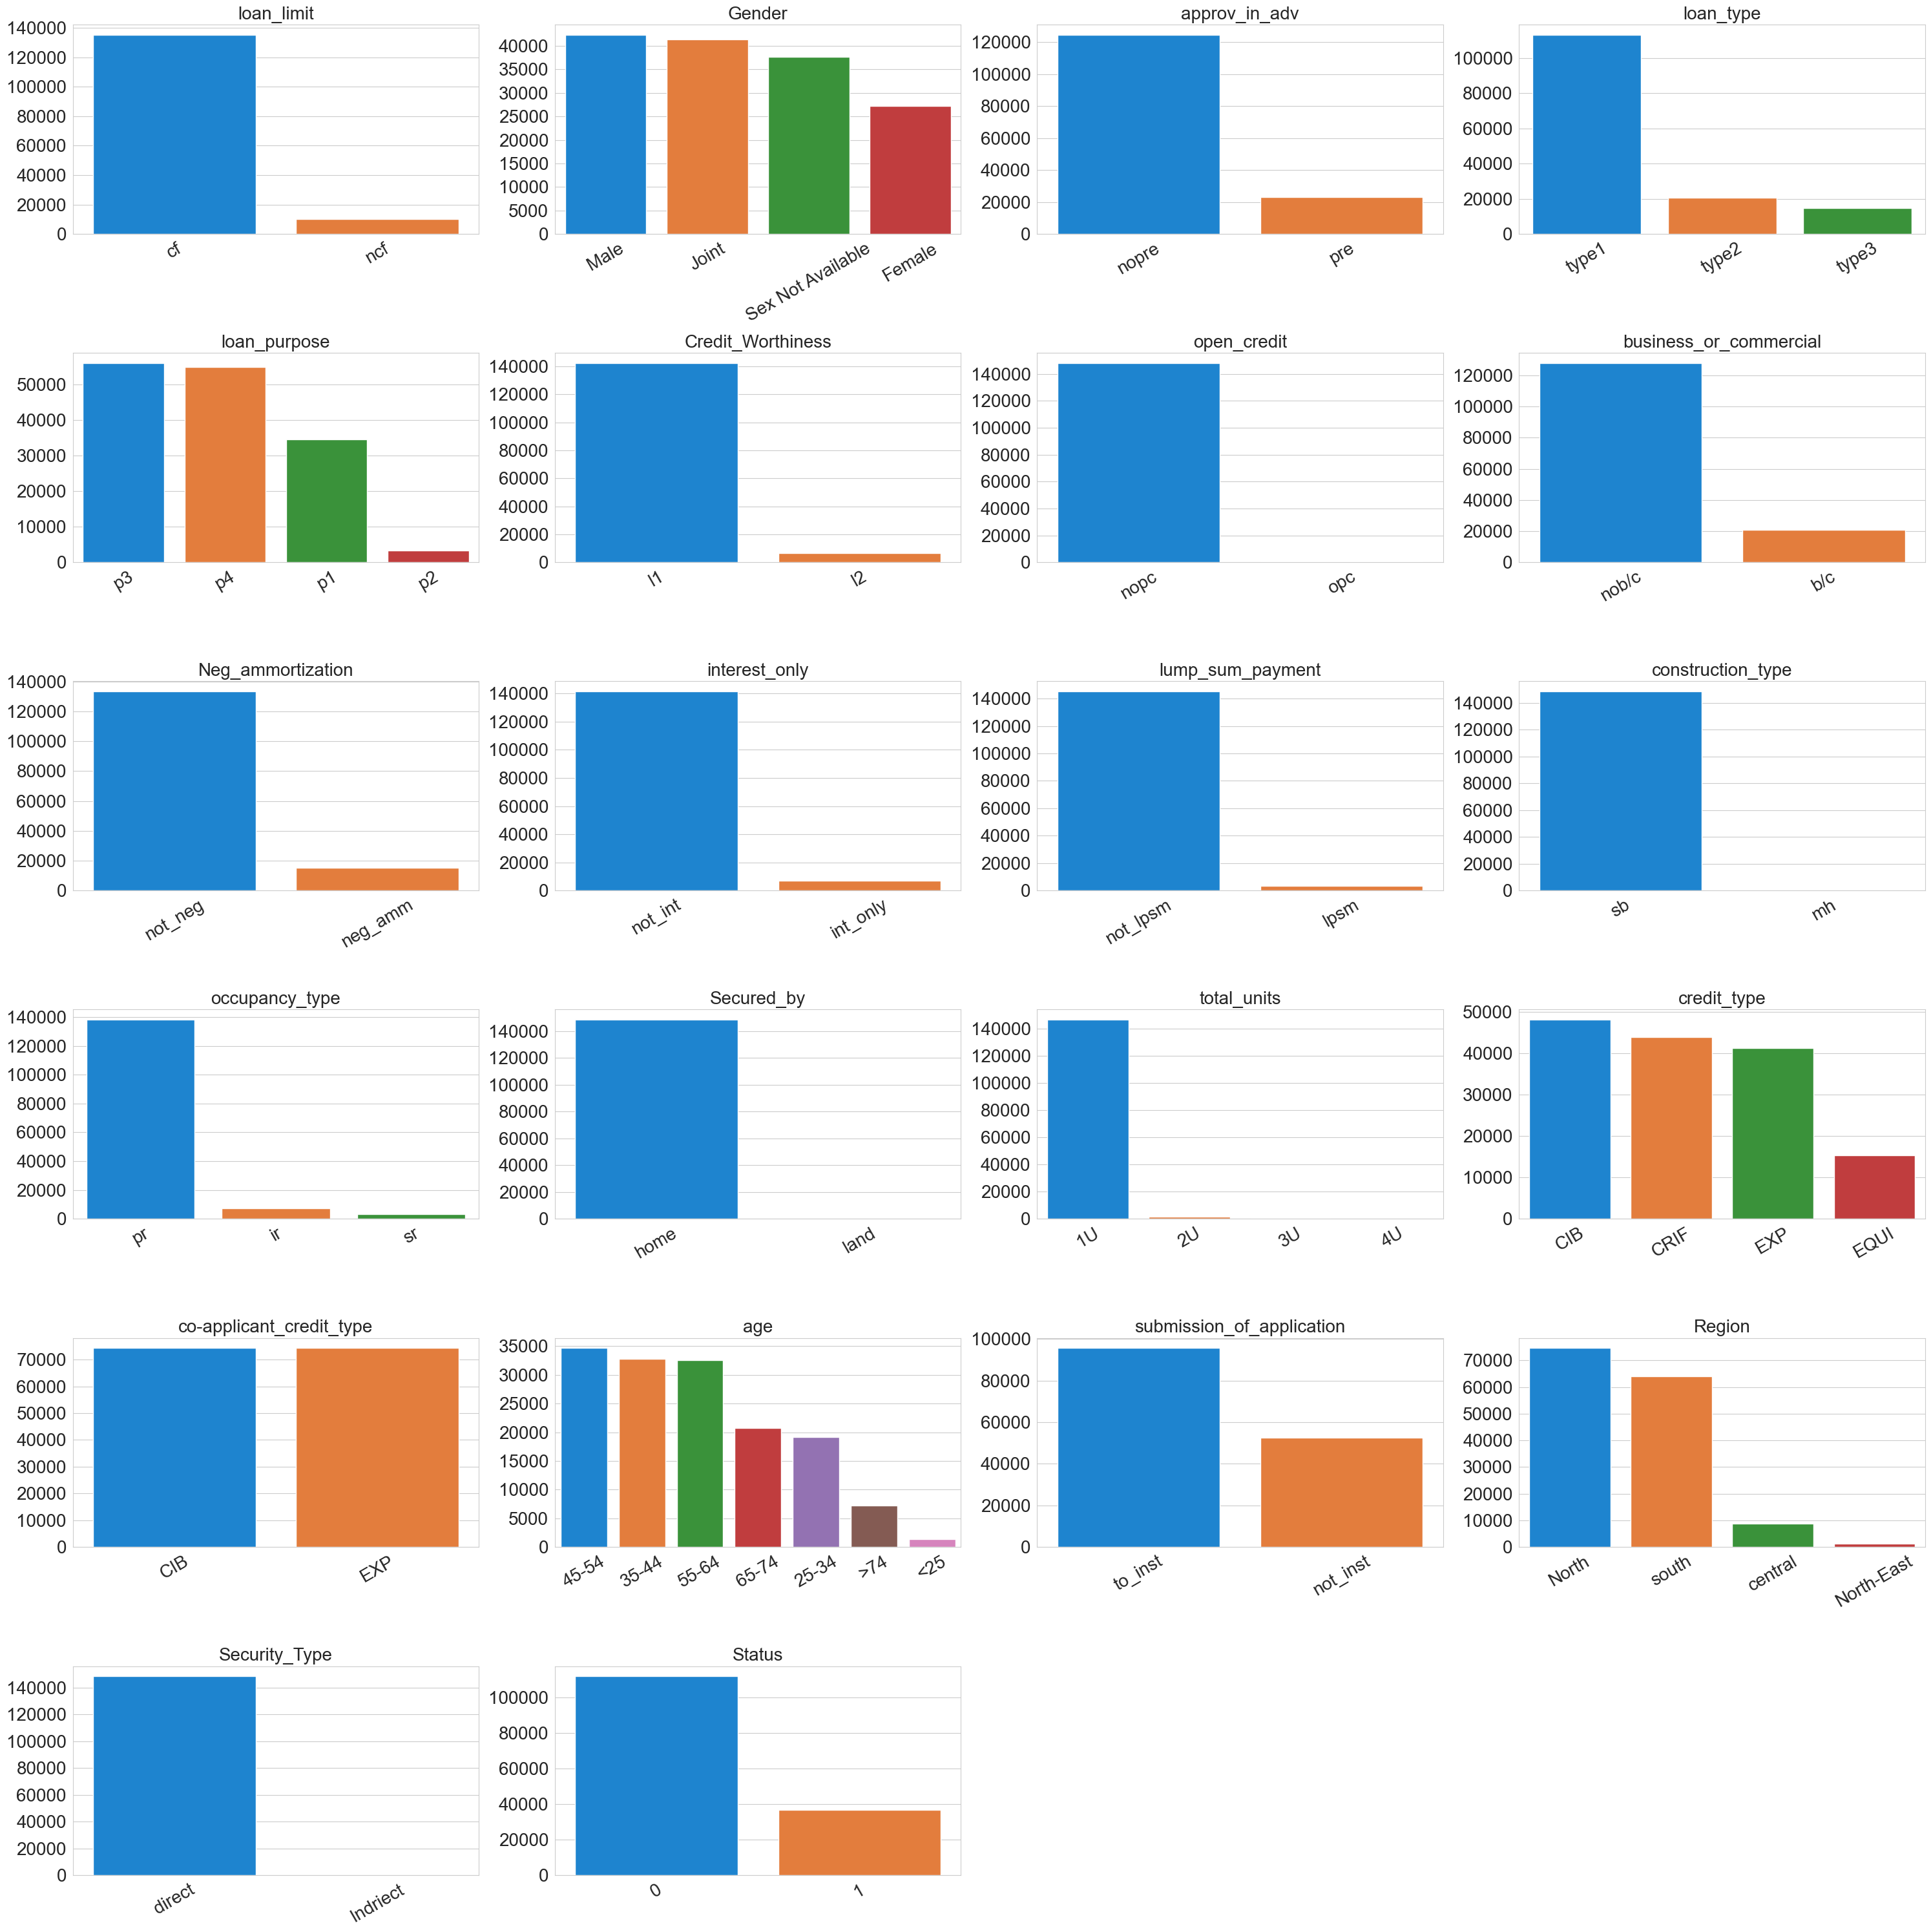

In [92]:
# 범주형 변수 countplot
fig = plt.figure(figsize=(30,30))
area = []
i=0
for col in category_data.columns:
    area.append(fig.add_subplot(6,4,i+1))
    sns.countplot(x=col ,data=category_data, ax=area[i],order=data[col].value_counts().index)
    plt.title(category_data.columns[i], fontsize = 20)
    plt.xticks(rotation=30,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i+=1

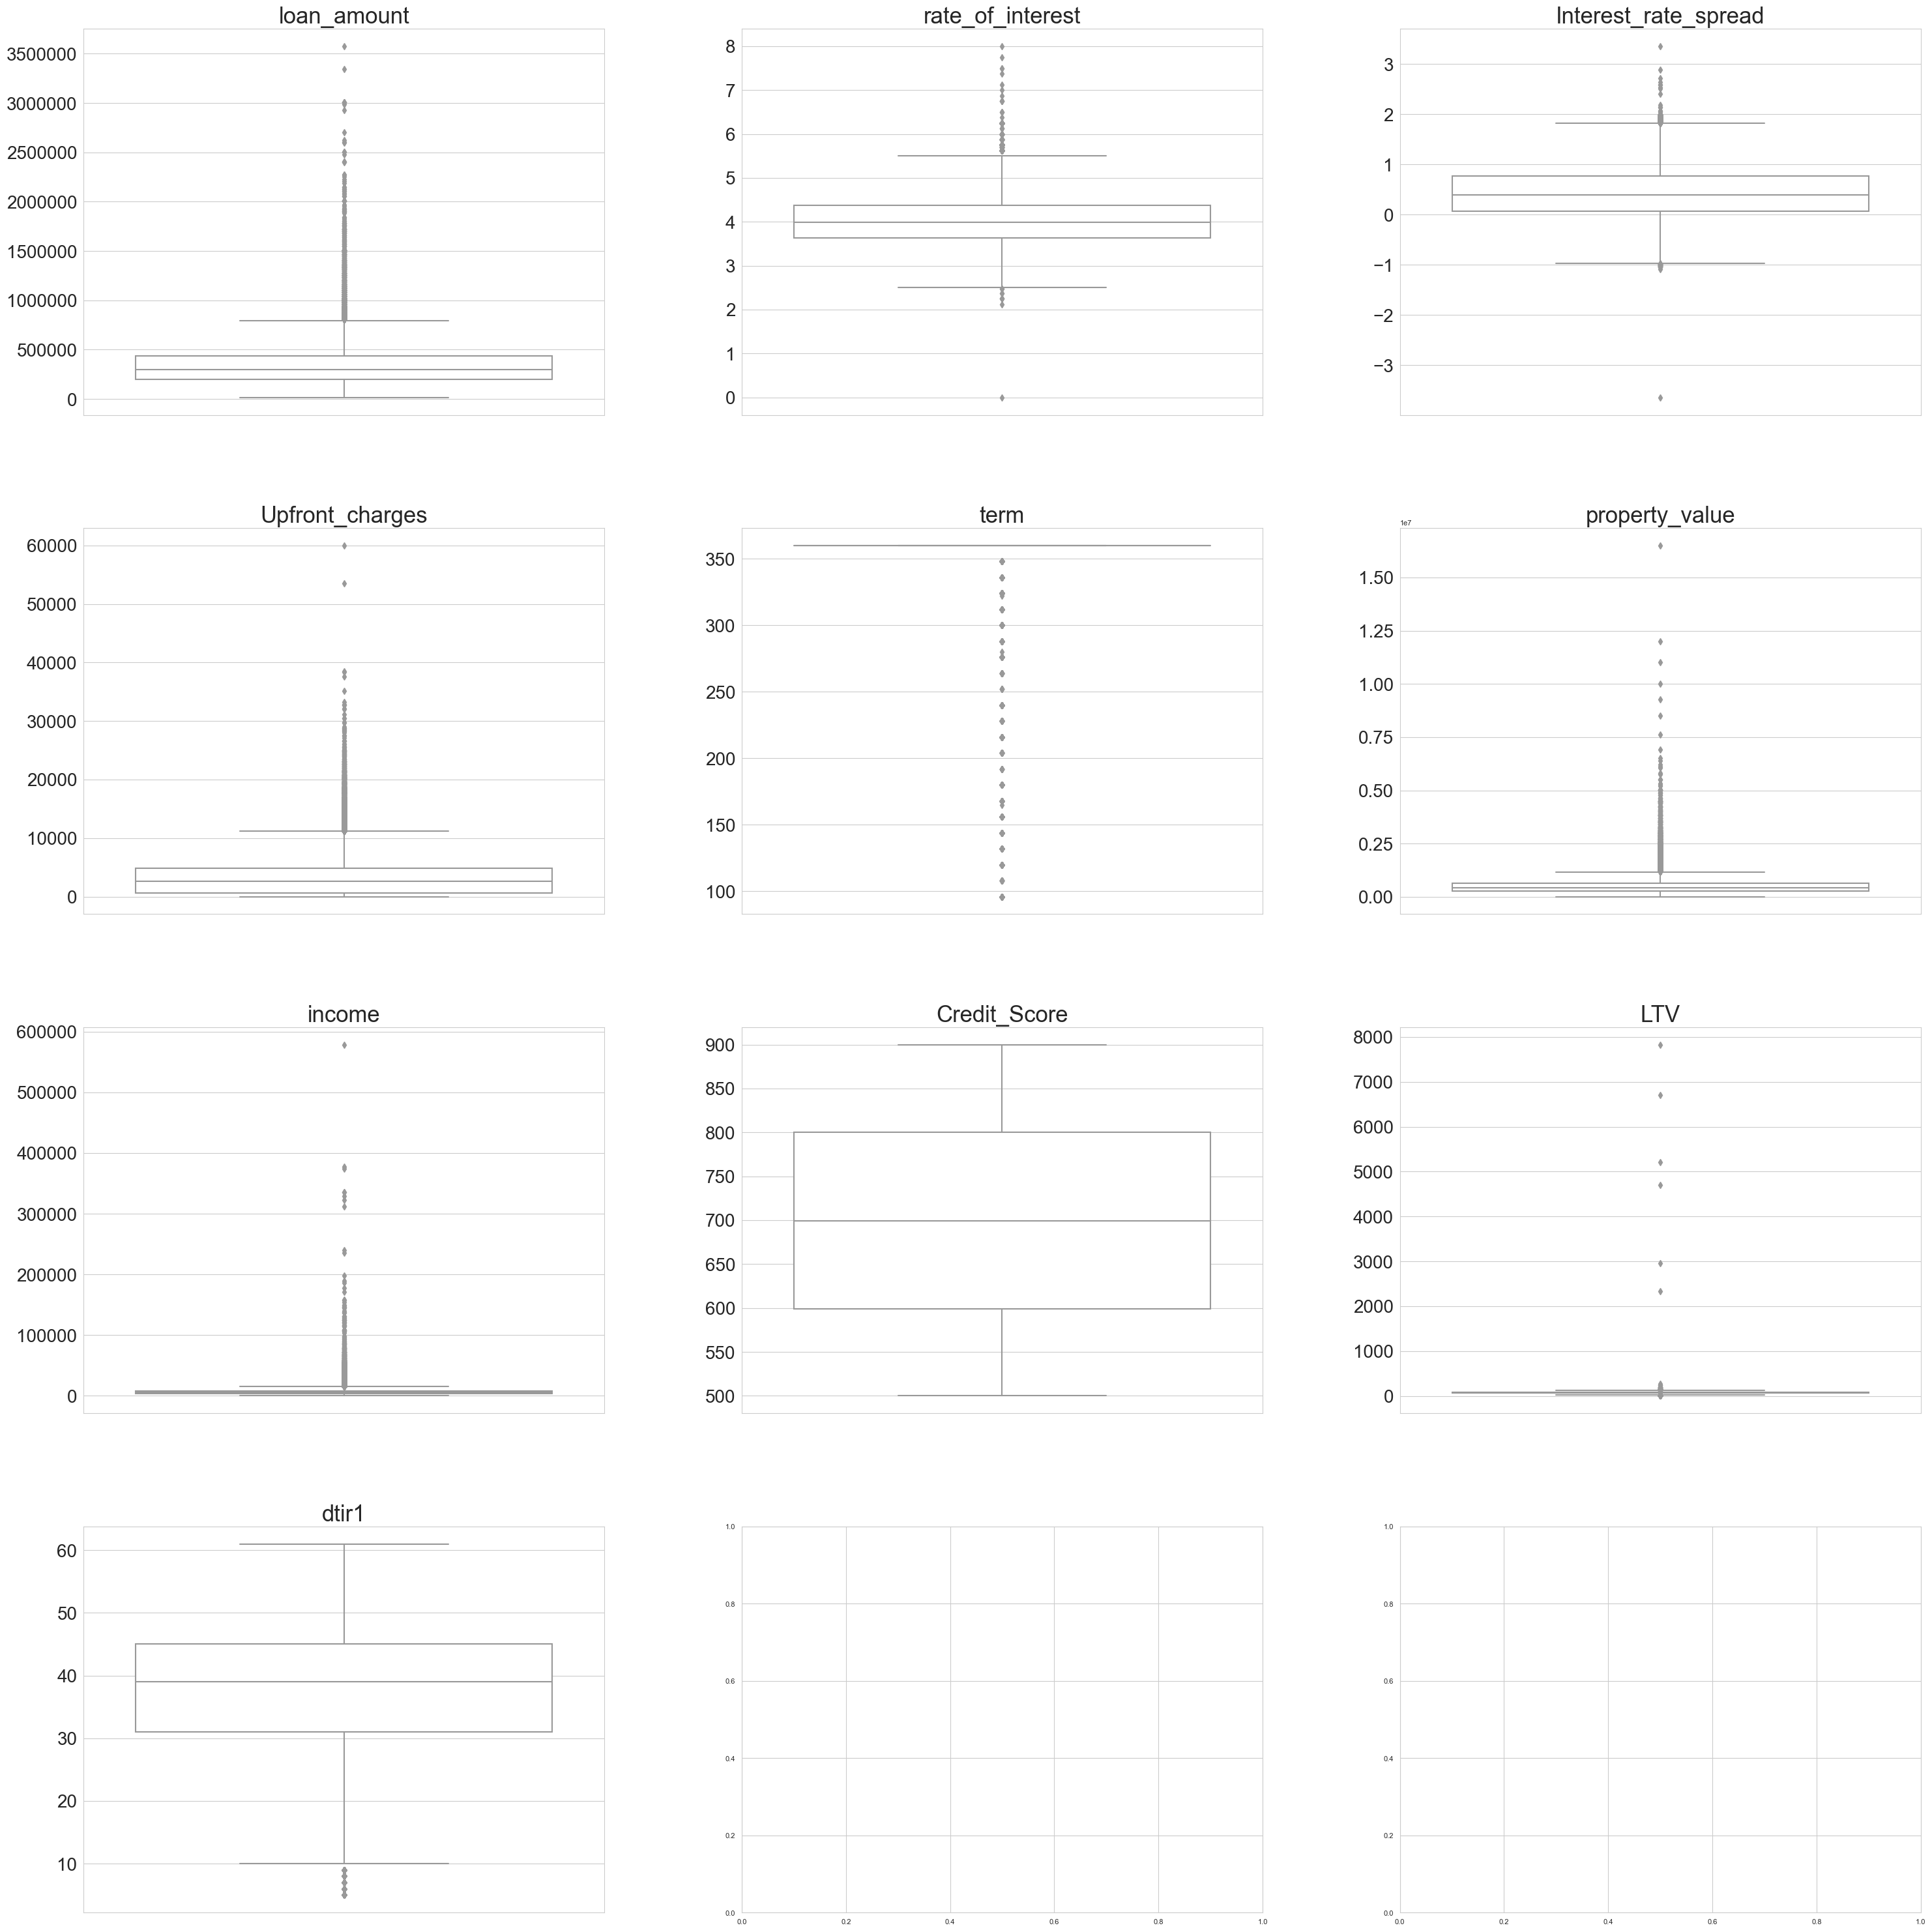

In [93]:
# 수치형 변수 Boxplot
fig, ax = plt.subplots(4, 3, constrained_layout=True)
i=0
for col in numerical_data.columns:
    plt.subplot(4, 3, i+1)
    sns.boxplot(data = numerical_data[col],orient="v",color='white')
    plt.title(col, fontsize = 25)
    plt.xticks([1],[''], fontsize = 10)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.tight_layout(pad = 2,h_pad=10, w_pad=10)
    i+=1

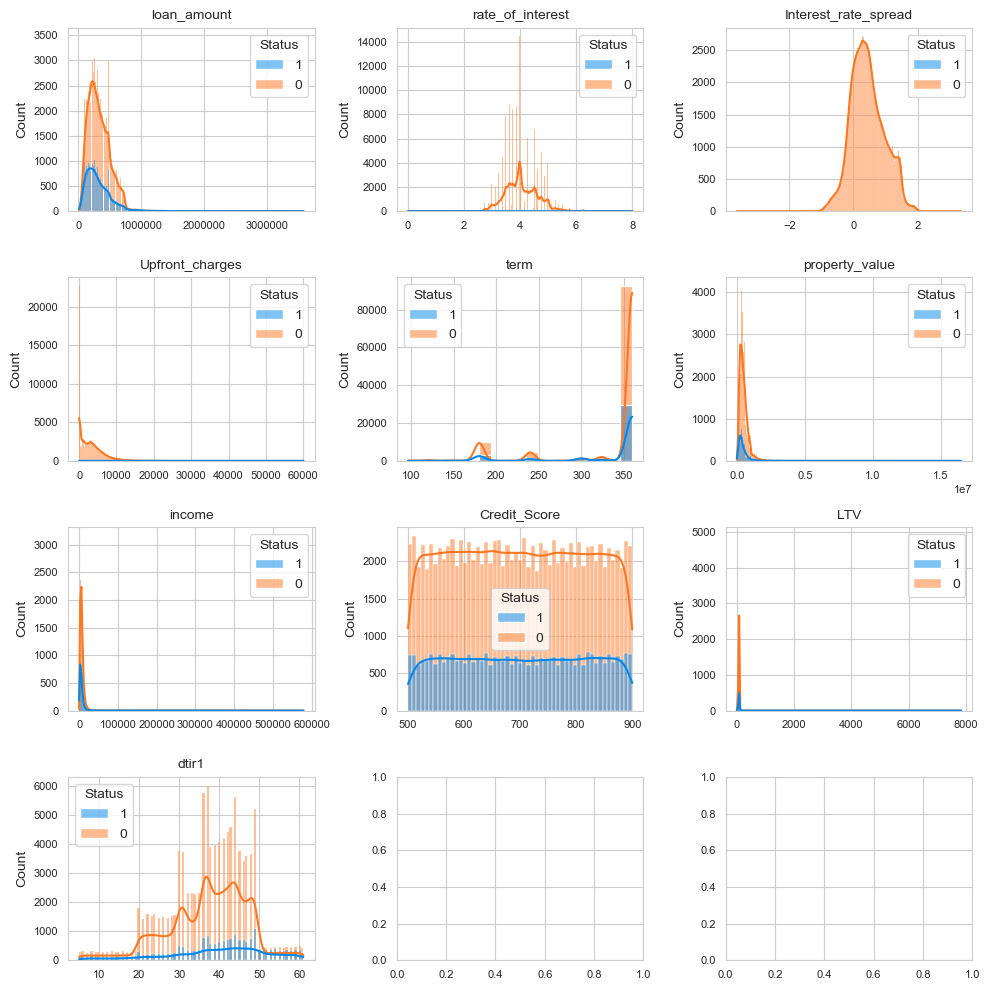

In [119]:
# 수치형 변수 Histplot
fig, ax = plt.subplots(4, 3, constrained_layout=True)
i=0
for col in numerical_data.columns:
    plt.subplot(4, 3, i+1)
    sns.histplot(x= col,data = numerical_data, hue=data['Status'], kde = True)
    plt.title(col, fontsize = 10)
    plt.xlabel('')
    
    plt.tight_layout()
    i+=1

<AxesSubplot:>

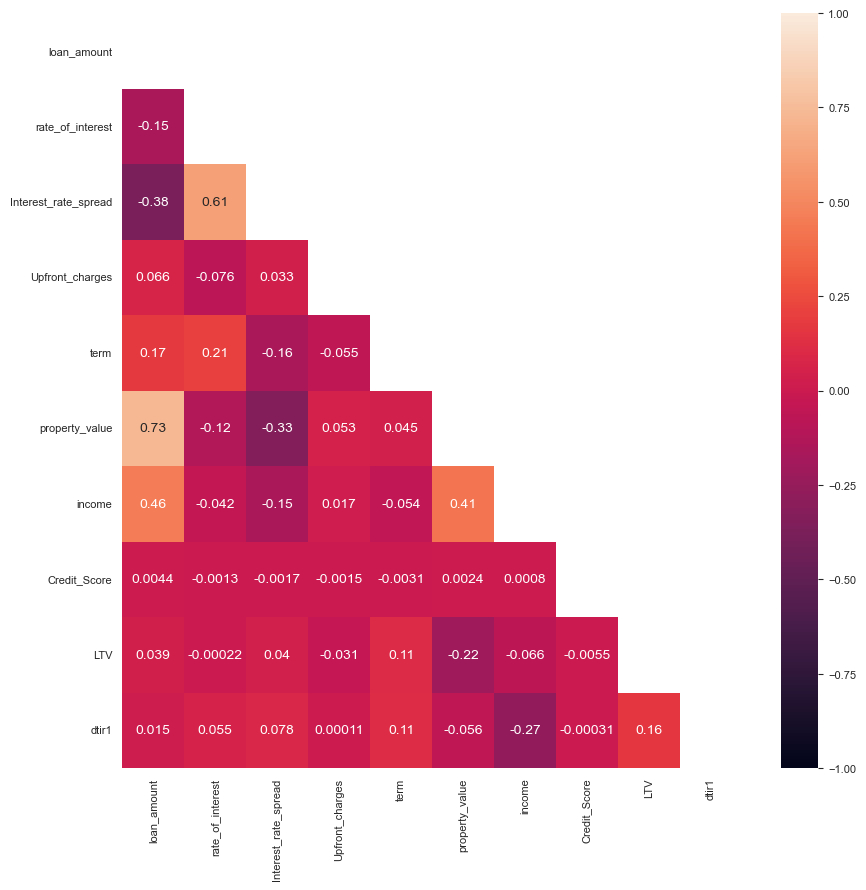

In [97]:
#수치형 변수 Corr Matrix
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(numerical_data.corr(), vmin=-1, vmax=1,annot=True,mask=mask)

property_value와 loan_amount가 강한 양의 선형상관관계를 가진다.

In [ ]:

import missingno as msno

<AxesSubplot:>

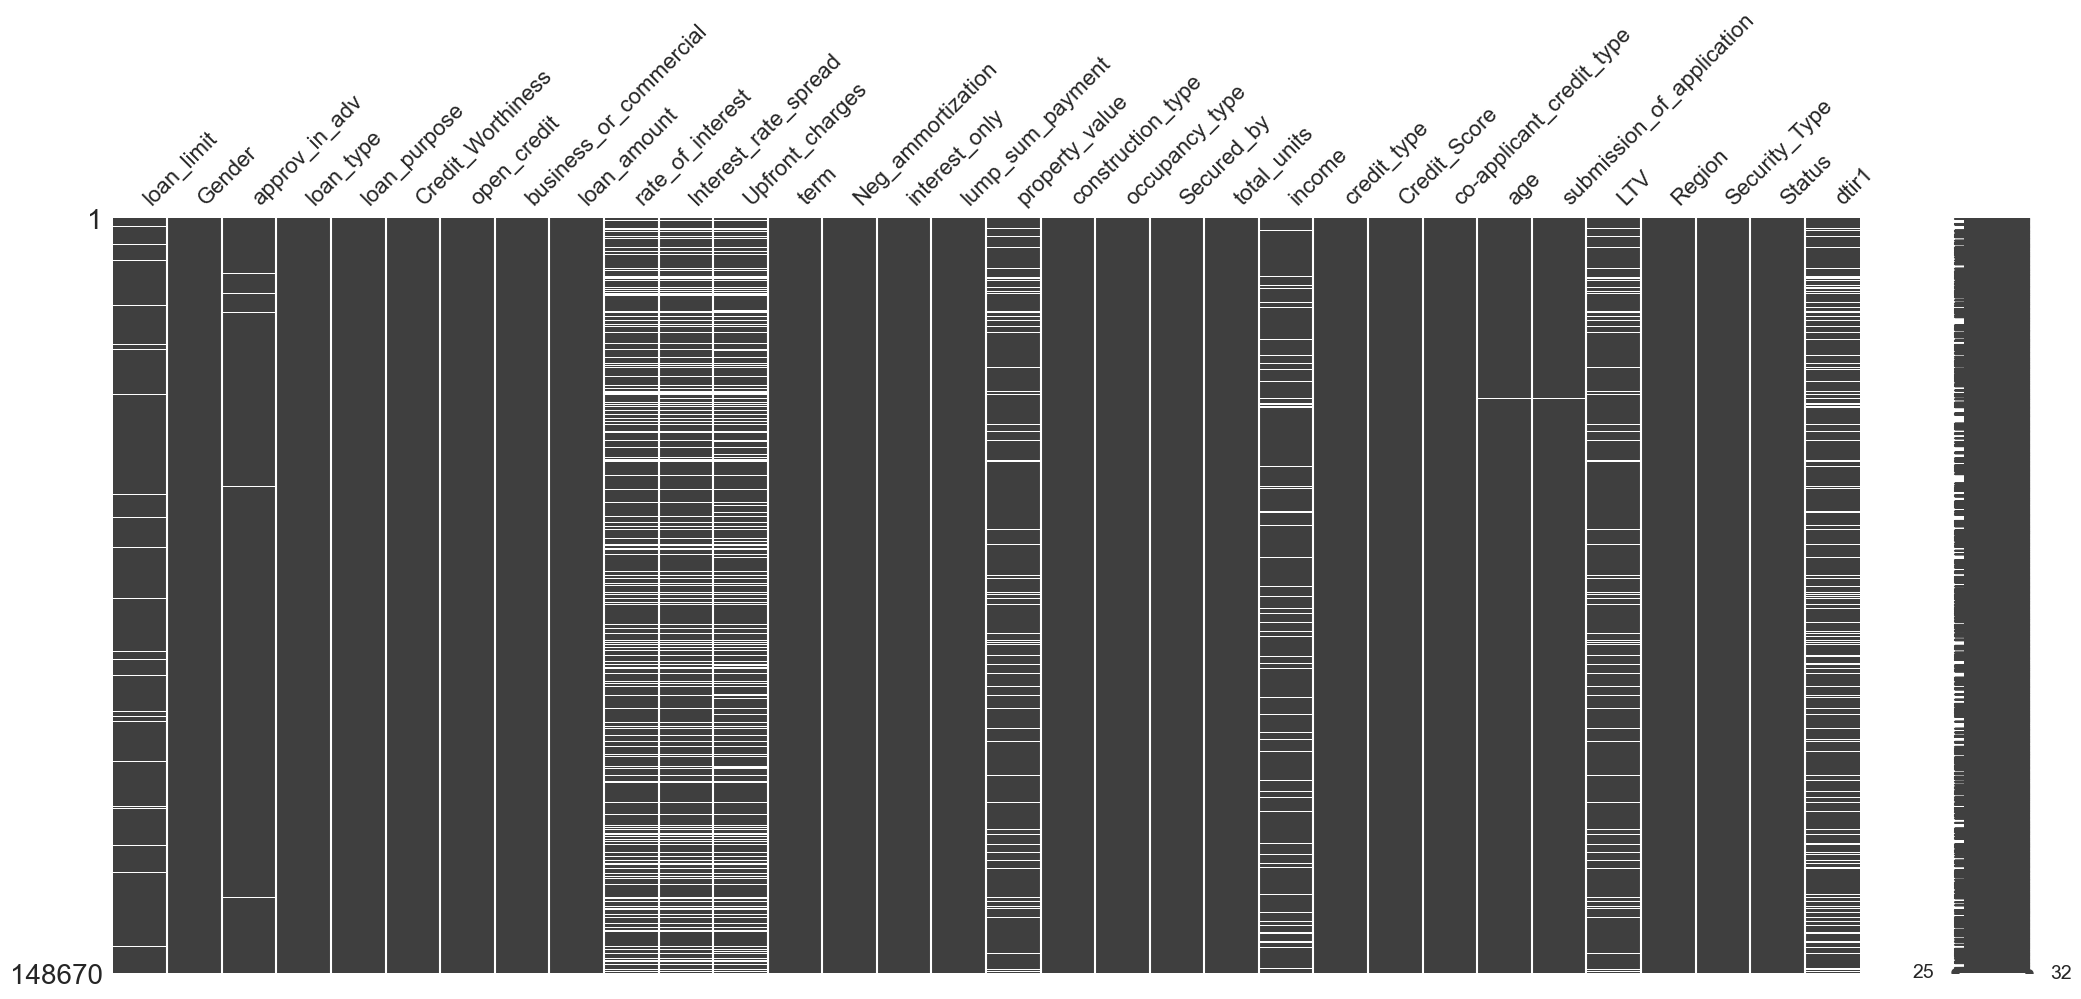

In [137]:
#missing value

msno.matrix(data)

결측치가 꽤 있으므로 처리가 필요하다.